In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("hierarchical_clustering_data.csv")
df

,CustomerID,Annual_Income,Spending_Score,Age,Region
0,1001,67450,17.58,31,North
1,1002,57926,11.35,27,West
2,1003,69715,64.01,38,East
3,1004,82845,70.94,48,North
4,1005,56487,4.13,16,North
...,...,...,...,...,...
995,1996,55783,28.79,28,South
996,1997,86965,21.49,22,East
997,1998,69612,52.14,24,East
998,1999,51432,1.55,30,South


In [3]:
df.isnull().sum()

CustomerID        0
Annual_Income     0
Spending_Score    0
Age               0
Region            0
dtype: int64

In [4]:
df.dtypes

CustomerID          int64
Annual_Income       int64
Spending_Score    float64
Age                 int64
Region             object
dtype: object

In [5]:
df.Region.unique()

array(['North', 'West', 'East', 'South'], dtype=object)

In [6]:
df["Region"].value_counts()

Region
South    274
East     251
North    240
West     235
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
Is=["Annual_Income","Spending_Score","Age"]

In [9]:
x=df[Is]

In [10]:
x

,Annual_Income,Spending_Score,Age
0,67450,17.58,31
1,57926,11.35,27
2,69715,64.01,38
3,82845,70.94,48
4,56487,4.13,16
...,...,...,...
995,55783,28.79,28
996,86965,21.49,22
997,69612,52.14,24
998,51432,1.55,30


In [11]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [12]:
x_scaled

array([[ 0.48774459, -1.16641275, -0.37449145],
       [-0.16098989, -1.38475612, -0.78704055],
       [ 0.64202679,  0.46082368,  0.34746948],
       ...,
       [ 0.63501086,  0.04481472, -1.09645238],
       [-0.60333363, -1.72821761, -0.47762872],
       [ 0.56526033, -1.72085772, -0.37449145]])

In [13]:
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram

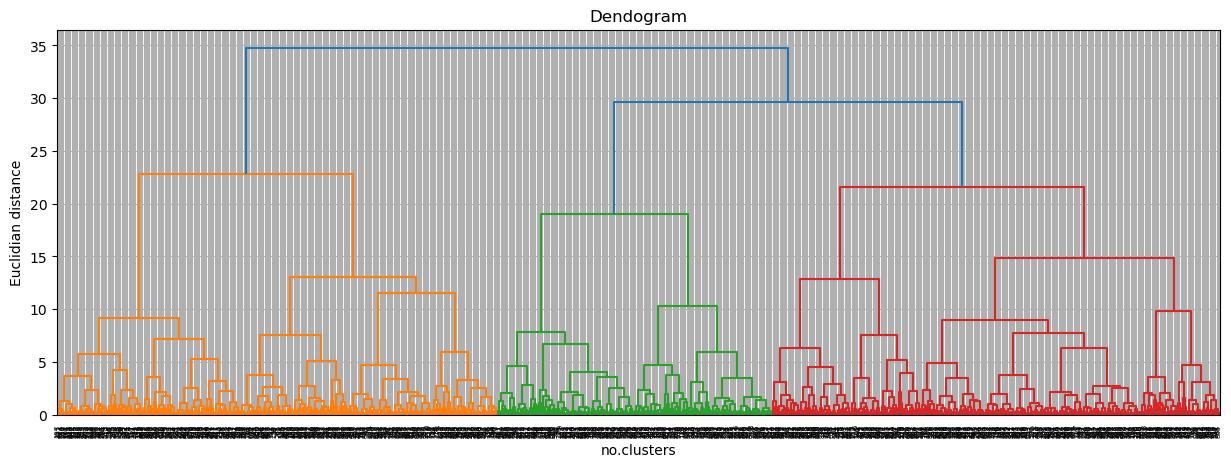

In [14]:
plt.figure(figsize=(15,5))
dendrogram(linkage(x_scaled,method='ward'))
plt.xlabel('no.clusters')
plt.ylabel('Euclidian distance')
plt.title('Dendogram')
plt.grid(True)
plt.show()

In [ ]:
link=linkage(x_scaled,method='ward')
cluster=fcluster(link,t=4,criterion='maxclust')#t=4 no if clusters
cluster

array([2, 2, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 1, 3, 2, 3, 2, 3, 4, 3,
       2, 1, 1, 2, 3, 4, 3, 2, 2, 4, 4, 2, 4, 3, 2, 3, 3, 4, 2, 4, 2, 2,
       1, 1, 3, 4, 3, 1, 2, 2, 3, 4, 4, 3, 2, 3, 4, 3, 3, 2, 1, 1, 3, 4,
       3, 4, 4, 2, 4, 4, 2, 4, 3, 4, 4, 2, 4, 3, 1, 4, 4, 4, 2, 1, 3, 4,
       4, 4, 3, 4, 3, 2, 1, 1, 2, 4, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 4,
       3, 3, 4, 4, 1, 2, 4, 1, 4, 4, 2, 2, 4, 3, 4, 4, 1, 1, 3, 3, 2, 3,
       3, 3, 2, 4, 2, 3, 4, 2, 2, 4, 1, 4, 3, 4, 3, 1, 4, 2, 4, 4, 3, 4,
       4, 3, 4, 4, 1, 3, 3, 4, 4, 3, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 4, 4,
       4, 4, 1, 4, 4, 3, 3, 4, 3, 2, 4, 2, 1, 1, 1, 4, 2, 1, 2, 2, 2, 1,
       4, 3, 4, 4, 4, 4, 1, 1, 4, 4, 2, 4, 4, 4, 4, 3, 3, 4, 3, 2, 2, 2,
       4, 3, 4, 3, 2, 3, 2, 2, 1, 2, 1, 2, 4, 2, 4, 4, 1, 2, 2, 4, 1, 4,
       4, 4, 1, 2, 1, 1, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 3, 2, 3, 3,
       1, 2, 4, 1, 3, 2, 4, 1, 4, 2, 1, 2, 4, 3, 2, 2, 2, 4, 4, 1, 4, 1,
       4, 4, 3, 2, 3, 1, 1, 4, 4, 3, 2, 2, 4, 3, 2,

In [16]:
df["clusterID"]=cluster

In [17]:
df

,CustomerID,Annual_Income,Spending_Score,Age,Region,clusterID
0,1001,67450,17.58,31,North,2
1,1002,57926,11.35,27,West,2
2,1003,69715,64.01,38,East,4
3,1004,82845,70.94,48,North,4
4,1005,56487,4.13,16,North,2
...,...,...,...,...,...,...
995,1996,55783,28.79,28,South,2
996,1997,86965,21.49,22,East,2
997,1998,69612,52.14,24,East,4
998,1999,51432,1.55,30,South,2


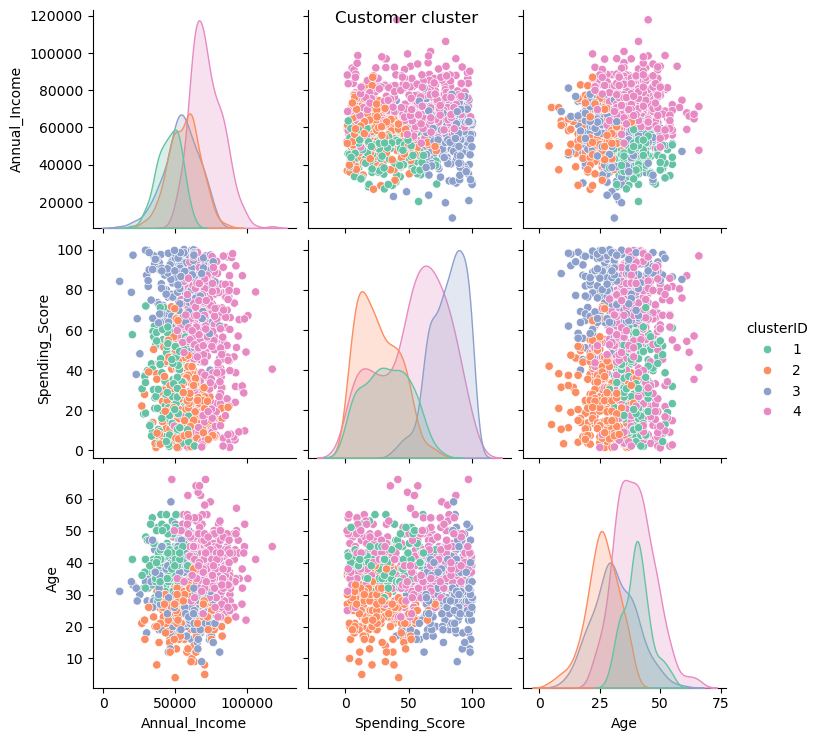

In [24]:
sns.pairplot(df,hue='clusterID',vars=['Annual_Income','Spending_Score','Age'],palette='Set2')
plt.suptitle('Customer cluster')
plt.show()

In [22]:
import plotly.express as px

In [25]:
fig=px.scatter_3d(df,x='Annual_Income',y='Spending_Score',z='Age',color='clusterID',hover_name='CustomerID',title='3d Visualization')
fig.update_layout(scene=dict(xaxis_title='Annaul_income',yaxis_title='Spending_Score',zaxis_title='Age'),width=700,height=700)
fig.show()

In [26]:
summary=df.groupby('clusterID')[['Annual_Income','Spending_Score','Age']].mean().round(2)
summary

,Annual_Income,Spending_Score,Age
clusterID,,,
1,45932.51,32.64,40.45
2,56517.37,25.87,25.93
3,54319.92,80.68,31.20
4,71978.48,54.42,39.38
